<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Integral_de_furier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-2538715782>:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(integrand, 0, a_max, limit=1000)
<ipython-input-4-2538715782>:12: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, 0, a_max, limit=1000)


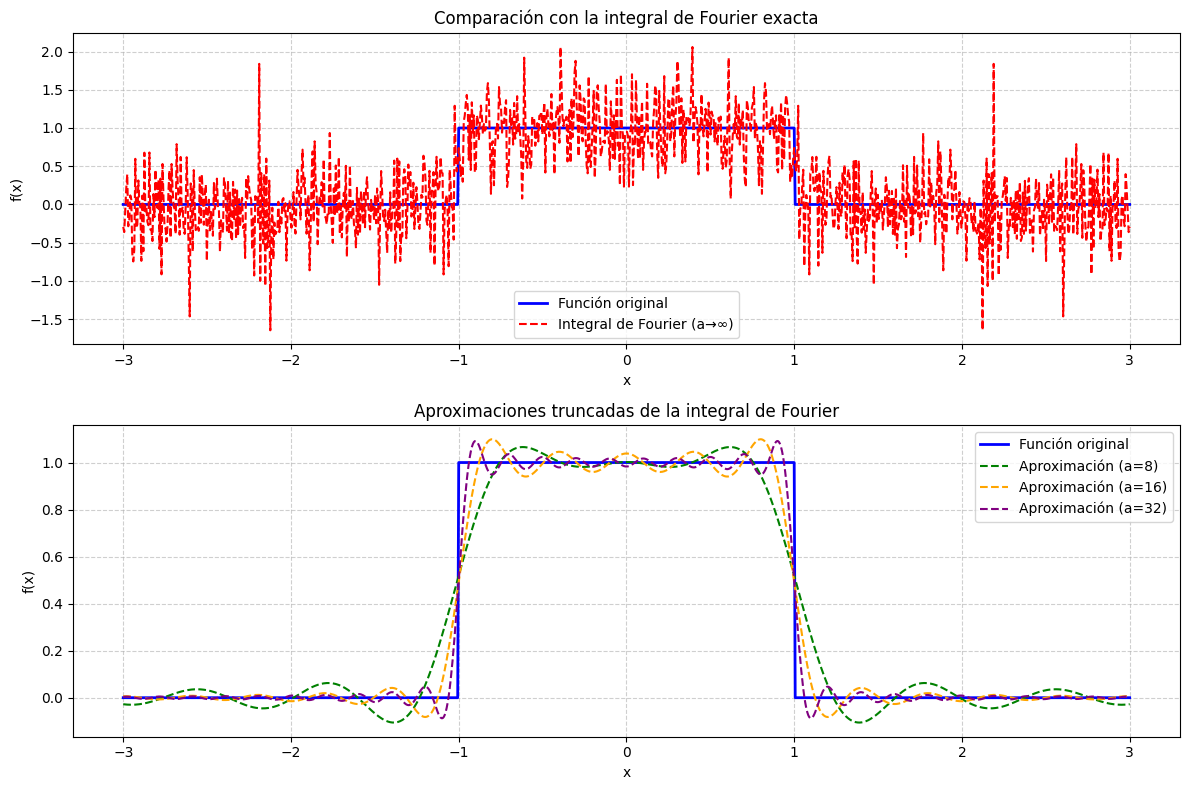

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


def pulse(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)

def fourier_integral(x, a_max=np.inf):
    integrand = lambda w: (2/np.pi) * (np.sin(w)/w) * np.cos(w*x)
    integral, _ = quad(integrand, 0, a_max, limit=1000)
    return integral


x_vals = np.linspace(-3, 3, 1000)


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(x_vals, pulse(x_vals), label='Función original', color='blue', linewidth=2)

fourier_vals = np.array([fourier_integral(x) for x in x_vals])
plt.plot(x_vals, fourier_vals, '--', label='Integral de Fourier (a→∞)', color='red', linewidth=1.5)
plt.title('Comparación con la integral de Fourier exacta')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(x_vals, pulse(x_vals), label='Función original', color='blue', linewidth=2)

a_values = [8, 16, 32]
colors = ['green', 'orange', 'purple']

for a, color in zip(a_values, colors):
    approx_vals = np.array([fourier_integral(x, a) for x in x_vals])
    plt.plot(x_vals, approx_vals, '--', label=f'Aproximación (a={a})', linewidth=1.5, color=color)

plt.title('Aproximaciones truncadas de la integral de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()